In [1]:
import sys
import csv
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve    
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
%matplotlib inline 

In [2]:
def read_datasets():
    """ Reads users profile from csv files """
    genuine_users = pd.read_csv("C:\\Users\\Rachel Reddy\\OneDrive\\Documents\\project\\data\\users.csv")
    fake_users = pd.read_csv("C:\\Users\\Rachel Reddy\\OneDrive\\Documents\\project\\data\\fusers.csv")
    # print genuine_users.columns
    # print genuine_users.describe()
    #print fake_users.describe()
    x=pd.concat([genuine_users,fake_users])   
    y=len(fake_users)*[0] + len(genuine_users)*[1]
    return x,y
x,y=read_datasets()

In [3]:
x = x[[
    "statuses_count",
    "followers_count",
    "friends_count",
    "favourites_count",
    "listed_count","Reported_count"       ]]
print(x)

      statuses_count  followers_count  friends_count  favourites_count  \
0              20370             5470           2385               145   
1               3131              506            381                 9   
2               4024              264             87               323   
3              40586              640            622              1118   
4               2016               62             64                13   
...              ...              ...            ...               ...   
1332               1                0             17                 0   
1333               0                1             17                 0   
1334               2                0             15                 0   
1335               2                0             16                 0   
1336               0                0             17                 0   

      listed_count  Reported_count  
0               52               1  
1               40               1  


In [4]:
print("spliting datasets in train and test dataset...\n")
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=44)
print(x_train)
print(y_train)
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_train=mm.fit_transform(x_train)
x_test=mm.transform(x_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
print("Training accuracy:",model.score(x_train,y_train))
print("Testing accuracy:",model.score(x_test,y_test))
cm=confusion_matrix(y_test,y_pred)
print(cm)

spliting datasets in train and test dataset...

      statuses_count  followers_count  friends_count  favourites_count  \
562               30               14            300                 0   
239             1667           408372            194                 4   
165             4288              126            199                 5   
1349             436               41            232                22   
286                0                0              0                 0   
...              ...              ...            ...               ...   
663               42               14            347                 0   
571              124               26             55                 4   
1197             325              175            149                 2   
1320               2                1             14                 0   
331               74               19            736                 0   

      listed_count  Reported_count  
562              0        

In [10]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

The best classifier is:  SVC(C=316.22776601683796, gamma=0.01)
[0.93348115 0.94678492 0.94900222 0.9556541  0.95111111]
Estimated score: 0.94721 (+/- 0.00373)


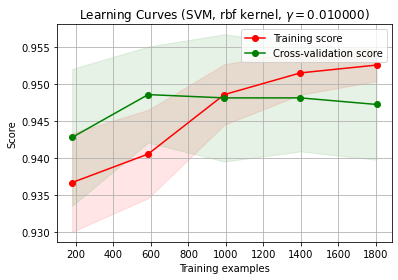

[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 

In [11]:
x_train=preprocessing.scale(x_train)
x_test=preprocessing.scale(x_test)
Cs = 10.0 ** np.arange(-2,3,.5)
gammas = 10.0 ** np.arange(-2,3,.5)
param = [{'gamma': gammas, 'C': Cs}]
cvk = StratifiedKFold(n_splits=2)
classifier = SVC()
clf = GridSearchCV(classifier,param_grid=param,cv=cvk)
clf.fit(x_train,y_train)
print("The best classifier is: ",clf.best_estimator_)
clf.best_estimator_.fit(x_train,y_train)
scores = cross_val_score(clf.best_estimator_, x_train,y_train, cv=5)
print(scores)
print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() / 2))
title = 'Learning Curves (SVM, rbf kernel, $\gamma=%.6f$)' %clf.best_estimator_.gamma
plot_learning_curve(clf.best_estimator_, title, x_train, y_train, cv=5)
plt.show()
# Predict class
y_pred = clf.best_estimator_.predict(x_test)
print(y_test,y_pred)

In [12]:
print('Classification Accuracy on Test dataset: ' ,accuracy_score(y_test, y_pred))

Classification Accuracy on Test dataset:  0.9450354609929078


In [13]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[266   2]
 [ 29 267]]


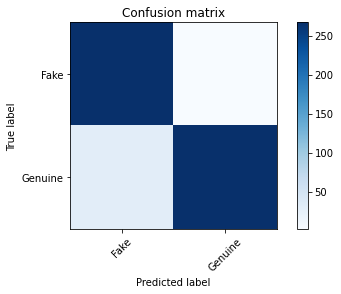

In [14]:
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix, without normalization')
print(cm)
plot_confusion_matrix(cm)

Normalized confusion matrix
[[0.99253731 0.00746269]
 [0.09797297 0.90202703]]


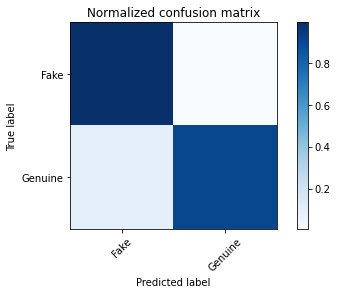

In [15]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [16]:
print(classification_report(y_test, y_pred, target_names=['Fake','Genuine']))

              precision    recall  f1-score   support

        Fake       0.90      0.99      0.94       268
     Genuine       0.99      0.90      0.95       296

    accuracy                           0.95       564
   macro avg       0.95      0.95      0.95       564
weighted avg       0.95      0.95      0.95       564



In [17]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    print("False Positive rate: ",false_positive_rate)
    print("True Positive rate: ",true_positive_rate)


    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

False Positive rate:  [0.         0.00746269 1.        ]
True Positive rate:  [0.         0.90202703 1.        ]


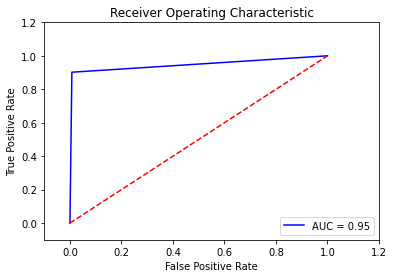

In [18]:
plot_roc_curve(y_test, y_pred)